In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
from dateutil.relativedelta import relativedelta
from fin_ratios import annual_risk_measures, range_80
from tqdm import tqdm

clust_162 = pd.read_pickle('clust_162.pickle')
returns = pd.read_pickle('returns.pickle')

date_2y_ago = pd.to_datetime(date.today() - relativedelta(years=2))
returns_2y = returns[returns.index > date_2y_ago]
returns_train = returns.T[pd.read_pickle('RMS_train.pickle').index].T.copy()

In [74]:
def ratios_summary(ind, rets):
    empty = pd.DataFrame()
    stock_name = rets.iloc[:,ind].name
    annual_measures = annual_risk_measures(empty, rets.iloc[:,ind]).dropna()
    annual_sortino_summary = pd.DataFrame([range_80(annual_measures, 'Sortino'), range_80(annual_measures, 'Beta'), range_80(annual_measures, 'CVar')], columns = ['10th centile','90th centile'])
    annual_sortino_summary.index = ['Sortino','Beta', 'CVar']
    #plt.plot(returns_2y.iloc[:,ind].cumsum())
    return stock_name, annual_sortino_summary

In [75]:
def shortlist(min_sortino, min_cvar, rets):
    shortlist = pd.Series()
    for i in tqdm(range(rets.shape[1])):
        try:
            name, data = ratios_summary(i, rets)
            if (data.iloc[0,0] > min_sortino) & (data.iloc[2,0] > min_cvar):
                shortlist = shortlist.append(pd.Series(name))
        except:
            None
    return shortlist

In [76]:
from scipy.stats.mstats import winsorize

def winsorize_col(s):
    return winsorize(s, limits=[0.005,0.005])

returns_2y_win = returns_2y.apply(winsorize_col, axis=0).T
returns_train_win = returns_train.apply(winsorize_col, axis=0).T

In [77]:
long_shortlist = shortlist(-0.3, -0.1, returns_train)

100%|██████████| 249/249 [01:16<00:00,  3.27it/s]


In [78]:
long_shortlist_returns = returns_train_win[returns_train_win.index.isin(long_shortlist)]

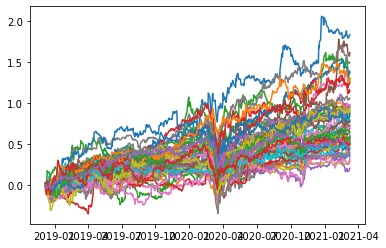

In [79]:
plt.plot(long_shortlist_returns.T.cumsum())

In [80]:
long_shortlist_returns.T.sum()

AB.PA       1.837862
ABCA.PA     0.440076
ABVX.PA     1.306555
AI.PA       0.516303
ALO.PA      0.364904
LTA.PA      0.695412
AMUN.PA     0.562279
ARG.PA      0.785040
AKE.PA      0.486810
ATEME.PA    0.789522
ATO.PA      0.458132
AURE.PA     0.549064
AXW.PA      0.732103
BLC.PA      0.603634
BIG.PA      0.986535
BIM.PA      0.723636
BSD.PA      1.374742
EN.PA       0.400290
CBOT.PA     0.297581
COH.PA      0.380067
DSY.PA      0.593071
EDEN.PA     0.592296
EKI.PA      0.851113
ESI.PA      0.543117
EUR.PA      0.352364
ERF.PA      0.883336
RMS.PA      0.721130
JBOG.PA     0.909443
KOF.PA      0.571472
KER.PA      0.615078
LR.PA       0.523382
OR.PA       0.578982
MC.PA       0.964765
NEX.PA      1.253594
ORP.PA      0.210914
OSE.PA      1.620001
PSAT.PA     0.985870
DIM.PA      1.497781
SU.PA       0.905797
SCHP.PA     0.805582
SOI.PA      1.380365
SO.PA       0.962148
SOP.PA      0.642574
STM.PA      1.143402
TEP.PA      0.954578
THEP.PA     0.781754
TKO.PA      0.326087
TRI.PA      1

In [15]:
long_shortlist.to_excel('shortlist.xlsx')

In [25]:
grp_63_ret = clust_152_returns[clust_152_returns['Cluster 152']==7].iloc[:,-366:-1].T